In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mysql.connector

In [2]:
df = pd.read_csv('swiggy_dataset.csv')
df.head()

,order_id,order_datetime,customer_id,customer_city,restaurant_id,restaurant_name,cuisine,order_amount,discount_amount,distance_km,...,delivery_status,customer_age_group,customer_type,customer_segment,customer_membership,restaurant_type,platform_fee,delivery_fee,coupon_code_used,is_first_order
0,ORD00001,09-07-2024 18:10,CUST00861,Pune,REST061,Burger Street,Bakery,316,161,1.47,...,Cancelled,18-25,Returning,Budget,Normal,Dine-in,10,37,FESTIVE30,No
1,ORD00002,24-09-2024 13:47,CUST01295,Hyderabad,REST005,Biryani House,Desserts,289,207,5.60,...,Cancelled,46-60,Returning,Regular,Normal,Franchise,5,39,FESTIVE30,No
2,ORD00003,13-06-2024 09:54,CUST01131,Chennai,REST192,Italiano Kitchen,Desserts,243,43,3.72,...,Delivered,18-25,Returning,Regular,Normal,Dine-in,5,28,SAVE20,No
3,ORD00004,23-01-2024 05:16,CUST01096,Chennai,REST005,Italiano Kitchen,Bakery,1354,287,7.35,...,Cancelled,26-35,Returning,Regular,Swiggy One,Cloud Kitchen,4,37,TRYNEW,No
4,ORD00005,15-11-2024 20:52,CUST01639,Kolkata,REST127,Spice Hub,North Indian,725,278,9.67,...,Delivered,46-60,New,Budget,Normal,Franchise,9,35,SAVE20,Yes


## 1. Initial checks

In [3]:
df.shape

(10000, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             10000 non-null  object 
 1   order_datetime       10000 non-null  object 
 2   customer_id          10000 non-null  object 
 3   customer_city        10000 non-null  object 
 4   restaurant_id        10000 non-null  object 
 5   restaurant_name      10000 non-null  object 
 6   cuisine              10000 non-null  object 
 7   order_amount         10000 non-null  int64  
 8   discount_amount      10000 non-null  int64  
 9   distance_km          10000 non-null  float64
 10  prep_time_mins       10000 non-null  int64  
 11  sugar_fee            10000 non-null  int64  
 12  delivery_time_mins   10000 non-null  int64  
 13  delivery_partner     10000 non-null  object 
 14  rating               10000 non-null  int64  
 15  payment_method       10000 non-null  

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,10000,10000,ORD00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_datetime,10000,9920,14-08-2024 14:45,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,10000,2889,CUST02687,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_city,10000,8,Pune,1288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant_id,10000,200,REST091,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant_name,10000,8,Foodie's Corner,1289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine,10000,8,Fast Food,1319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_amount,10000.0,NaN,NaN,NaN,824.872,388.561837,150.0,490.0,821.0,1162.0,1499.0
discount_amount,10000.0,NaN,NaN,NaN,150.8492,86.968734,0.0,75.0,151.0,228.0,299.0
distance_km,10000.0,NaN,NaN,NaN,6.286744,3.317835,0.5,3.44,6.28,9.16,12.0


In [6]:
df.dtypes

order_id                object
order_datetime          object
customer_id             object
customer_city           object
restaurant_id           object
restaurant_name         object
cuisine                 object
order_amount             int64
discount_amount          int64
distance_km            float64
prep_time_mins           int64
sugar_fee                int64
delivery_time_mins       int64
delivery_partner        object
rating                   int64
payment_method          object
delivery_status         object
customer_age_group      object
customer_type           object
customer_segment        object
customer_membership     object
restaurant_type         object
platform_fee             int64
delivery_fee             int64
coupon_code_used        object
is_first_order          object
dtype: object

In [7]:
df.isnull().sum()

order_id               0
order_datetime         0
customer_id            0
customer_city          0
restaurant_id          0
restaurant_name        0
cuisine                0
order_amount           0
discount_amount        0
distance_km            0
prep_time_mins         0
sugar_fee              0
delivery_time_mins     0
delivery_partner       0
rating                 0
payment_method         0
delivery_status        0
customer_age_group     0
customer_type          0
customer_segment       0
customer_membership    0
restaurant_type        0
platform_fee           0
delivery_fee           0
coupon_code_used       0
is_first_order         0
dtype: int64

## 2. Fix datatypes and Derive Datetime Features 

In [8]:
df['order_datetime'] = pd.to_datetime(df['order_datetime'], format='%d-%m-%Y %H:%M')

df['order_date'] = df['order_datetime'].dt.date
df['order_month'] = df['order_datetime'].dt.to_period('M').astype(str)
df['order_weekday'] = df['order_datetime'].dt.day_name()
df['order_hour'] = df['order_datetime'].dt.hour

In [9]:
print(df[['order_datetime','order_date', 'order_weekday','order_hour']].head())

       order_datetime  order_date order_weekday  order_hour
0 2024-07-09 18:10:00  2024-07-09       Tuesday          18
1 2024-09-24 13:47:00  2024-09-24       Tuesday          13
2 2024-06-13 09:54:00  2024-06-13      Thursday           9
3 2024-01-23 05:16:00  2024-01-23       Tuesday           5
4 2024-11-15 20:52:00  2024-11-15        Friday          20


## 3. Missing and duplicates handling

In [10]:
dup_count = df.duplicated(subset=['order_id']).sum()
print('Duplicated order id count:', dup_count)

Duplicated order id count: 0


In [11]:
# Fill numeric medians where needed
num_cols = ['distance_km','prep_time_mins','delivery_time_mins','order_amount','discount_amount','platform_fee','delivery_fee','sugar_fee']
for c in num_cols:
    if c in df.columns:
        df[c] = df[c].fillna(df[c].median())

# Fill categorical
cat_cols = ['coupon_code_used','customer_membership','delivery_partner','restaurant_type']
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].fillna('Unknown')

print('Missing after fill:', df.isnull().sum().sum())

Missing after fill: 0


## 4. Outlier handling

In [12]:
for col in ['delivery_time_mins','order_amount','distance_km','platform_fee','delivery_fee']:
    if col in df.columns:
        low = df[col].quantile(0.01)
        high = df[col].quantile(0.99)
        df[col] = df[col].clip(low, high)
        print(f'Clipped {col} to {low:.2f} - {high:.2f}')

Clipped delivery_time_mins to 15.00 - 89.00
Clipped order_amount to 164.00 - 1486.00
Clipped distance_km to 0.63 - 11.89
Clipped platform_fee to 3.00 - 15.00
Clipped delivery_fee to 10.00 - 40.00


## 5. Feature Engineering

In [13]:
# total_payable
if 'sugar_fee' in df.columns:
    df['total_payable'] = df['order_amount'] - df['discount_amount'] + df['sugar_fee'] + df['platform_fee'] + df['delivery_fee']
else:
    df['total_payable'] = df['order_amount'] - df['discount_amount'] + df['platform_fee'] + df['delivery_fee']

In [14]:
# expected delivery: prep + 4*distance
df['expected_delivery_mins'] = df['prep_time_mins'] + (df['distance_km'] * 4)

In [15]:
# delay mins and flag
df['delayed_mins'] = df['delivery_time_mins'] - df['expected_delivery_mins']
df['is_delayed'] = (df['delayed_mins'] > 5).astype(int)

In [16]:
# delivery_efficiency
df['distance_km'] = df['distance_km'].replace(0, np.nan)
df['delivery_efficiency'] = (df['delivery_time_mins'] / df['distance_km']).round(2)

In [17]:
# Order value bin
df['order_value_bin'] = pd.cut(df['total_payable'], bins=[-1, 199, 499, 999, 1e9], labels=['Low', 'Mid', 'High', 'Very High'])

In [18]:
# Is_repeat_customer
repeat_cust = df['customer_id'].value_counts()
df['is_repeat_customer'] = df['customer_id'].map(lambda x: 1 if repeat_cust.get(x, 0) > 1 else 0)

In [19]:
# encode is_first_order as binary
df['is_first_order_binary'] = (df['is_first_order']=='Yes').astype(int)

In [20]:
df.columns

Index(['order_id', 'order_datetime', 'customer_id', 'customer_city',
       'restaurant_id', 'restaurant_name', 'cuisine', 'order_amount',
       'discount_amount', 'distance_km', 'prep_time_mins', 'sugar_fee',
       'delivery_time_mins', 'delivery_partner', 'rating', 'payment_method',
       'delivery_status', 'customer_age_group', 'customer_type',
       'customer_segment', 'customer_membership', 'restaurant_type',
       'platform_fee', 'delivery_fee', 'coupon_code_used', 'is_first_order',
       'order_date', 'order_month', 'order_weekday', 'order_hour',
       'total_payable', 'expected_delivery_mins', 'delayed_mins', 'is_delayed',
       'delivery_efficiency', 'order_value_bin', 'is_repeat_customer',
       'is_first_order_binary'],
      dtype='object')

In [21]:
df.to_csv('swiggy_data.csv')

# Exploratory Data Analysis

### Orders by city and Customers Segment

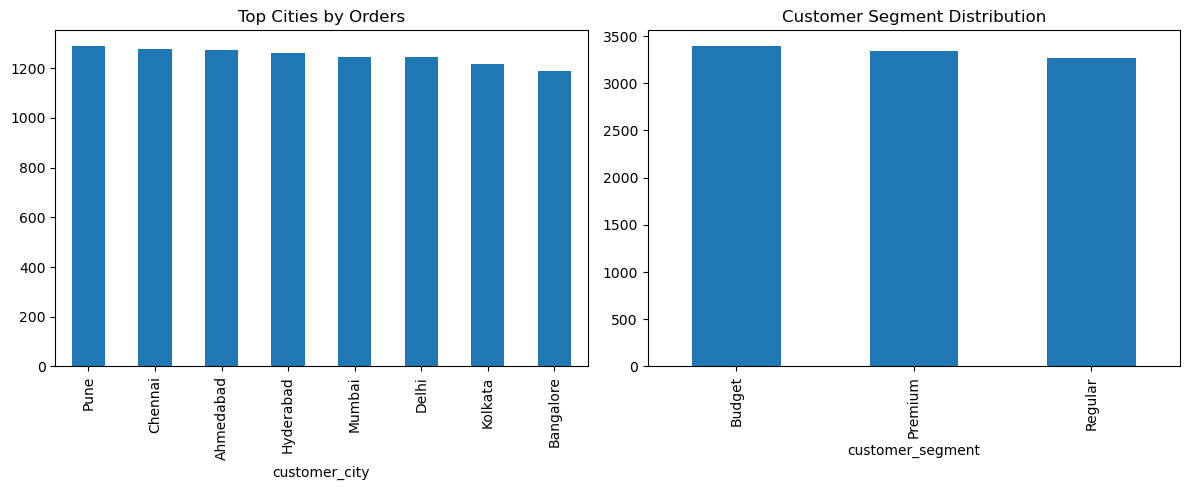

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df['customer_city'].value_counts().head(10).plot(kind='bar', ax=ax[0])
ax[0].set_title('Top Cities by Orders')

df['customer_segment'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Customer Segment Distribution')

plt.tight_layout()
plt.show()

### Cuisine and Restaurant Analysis

In [23]:
print('Top Cuuisines:\n', df['cuisine'].value_counts().head())
print('\nTop restaurants:\n', df['restaurant_name'].value_counts().head())

Top Cuuisines:
 cuisine
Fast Food    1319
Italian      1308
Biryani      1272
Desserts     1254
Bakery       1224
Name: count, dtype: int64

Top restaurants:
 restaurant_name
Foodie's Corner     1289
Burger Street       1273
Spice Hub           1272
Sweet Treats        1269
Italiano Kitchen    1265
Name: count, dtype: int64


### Delivery Metrics

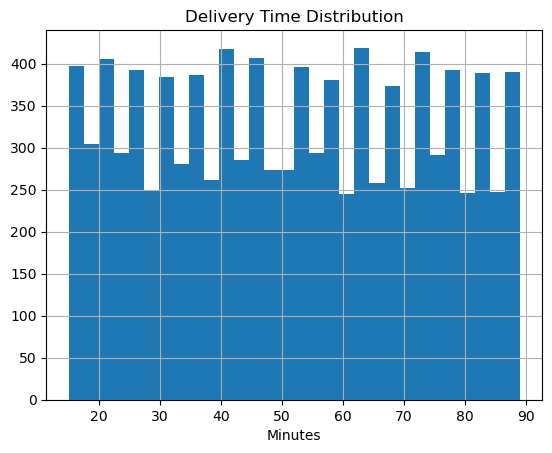


Avg delivery time by restaurant type:
 restaurant_type
Cloud Kitchen    52.0
Dine-in          51.2
Franchise        51.7
Name: delivery_time_mins, dtype: float64


In [24]:
df['delivery_time_mins'].hist(bins=30)
plt.title('Delivery Time Distribution')
plt.xlabel('Minutes')
plt.show()

print('\nAvg delivery time by restaurant type:\n', df.groupby('restaurant_type')['delivery_time_mins'].mean().round(1))

### Membership and Coupons Impact

In [25]:
print('Avg order amount by membership:\n', df.groupby('customer_membership')['order_amount'].mean().round(2))
print('\nCoupon usage counts:\n', df['coupon_code_used'].value_counts())

Avg order amount by membership:
 customer_membership
Normal        824.13
Swiggy One    827.99
Name: order_amount, dtype: float64

Coupon usage counts:
 coupon_code_used
NEW50        2052
TRYNEW       2022
NONE         1988
SAVE20       1972
FESTIVE30    1966
Name: count, dtype: int64


### Rating Vs Delivery Time

rating
1    51.6
2    51.7
3    51.3
4    51.3
5    52.4
Name: delivery_time_mins, dtype: float64


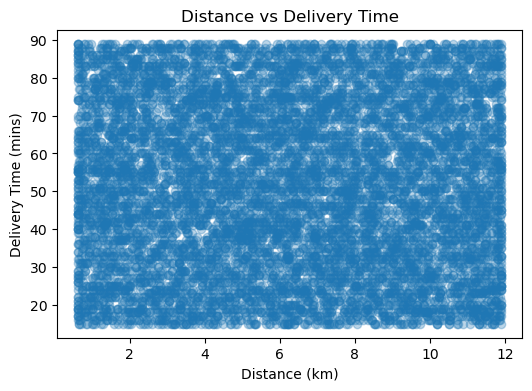

In [26]:
print(df.groupby('rating')['delivery_time_mins'].mean().round(1))

# Scatter: distance vs delivery_time
plt.figure(figsize=(6,4))
plt.scatter(df['distance_km'], df['delivery_time_mins'], alpha=0.3)
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (mins)')
plt.title('Distance vs Delivery Time')
plt.show()

### Peak hours and repeat customers

In [27]:
df['order_datetime'] = pd.to_datetime(df['order_datetime'])
df['hour'] = df['order_datetime'].dt.hour
print('Orders by hour:\n', df['hour'].value_counts().sort_index())
print('\nRepeat customers count:\n', df['customer_id'].value_counts().gt(1).sum())

Orders by hour:
 hour
0     445
1     420
2     444
3     408
4     431
5     422
6     423
7     404
8     372
9     438
10    420
11    410
12    392
13    447
14    380
15    421
16    400
17    373
18    438
19    413
20    445
21    404
22    444
23    406
Name: count, dtype: int64

Repeat customers count:
 2545


## Creating a Database connection

In [29]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="swiggy_sales_db"
)
print("Connection Successfull!")

cursor = conn.cursor()

Connection Successfull!


In [30]:
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://root:@localhost/swiggy_sales_db')

#LOAD DATA INTO MYSQL
df.to_sql('swiggy_data', con=engine, if_exists='replace', index=False)

print('Data Successfully imported to MYSQL')

Data Successfully imported to MYSQL
